# FIRST DATASET

fedesoriano. (September 2021). Heart Failure Prediction Dataset. Retrieved [Date Retrieved] from https://www.kaggle.com/fedesoriano/heart-failure-prediction.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import KFold, cross_val_score
import xgboost as xgb
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

In [ ]:
df=pd.read_csv('/content/heart.csv')

## EXPLORATORY DATA ANALYSIS

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


In [ ]:
print(df[df.HeartDisease==0].describe().T)
print(df[df.HeartDisease==1].describe().T)

              count        mean        std   min     25%    50%     75%    max
Age           410.0   50.551220   9.444915  28.0   43.00   51.0   57.00   76.0
RestingBP     410.0  130.180488  16.499585  80.0  120.00  130.0  140.00  190.0
Cholesterol   410.0  227.121951  74.634659   0.0  197.25  227.0  266.75  564.0
FastingBS     410.0    0.107317   0.309894   0.0    0.00    0.0    0.00    1.0
MaxHR         410.0  148.151220  23.288067  69.0  134.00  150.0  165.00  202.0
Oldpeak       410.0    0.408049   0.699709  -1.1    0.00    0.0    0.60    4.2
HeartDisease  410.0    0.000000   0.000000   0.0    0.00    0.0    0.00    0.0
              count        mean         std   min    25%    50%     75%    max
Age           508.0   55.899606    8.727056  31.0   51.0   57.0   62.00   77.0
RestingBP     508.0  134.185039   19.828685   0.0  120.0  132.0  145.00  200.0
Cholesterol   508.0  175.940945  126.391398   0.0    0.0  217.0  267.00  603.0
FastingBS     508.0    0.334646    0.472332   0.0   

In [ ]:
df.corrwith(df["HeartDisease"]).sort_values(ascending=False)

HeartDisease    1.000000
Oldpeak         0.403951
Age             0.282039
FastingBS       0.267291
RestingBP       0.107589
Cholesterol    -0.232741
MaxHR          -0.400421
dtype: float64

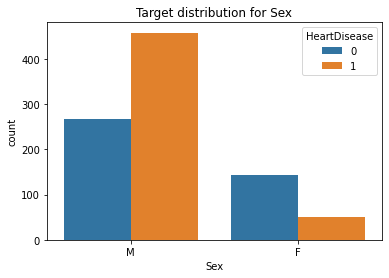

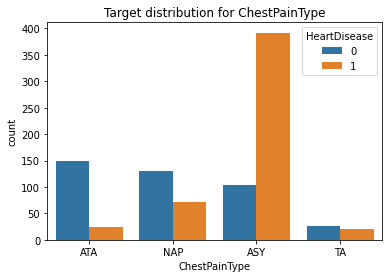

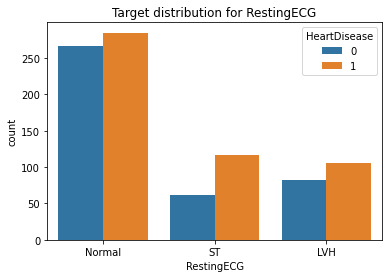

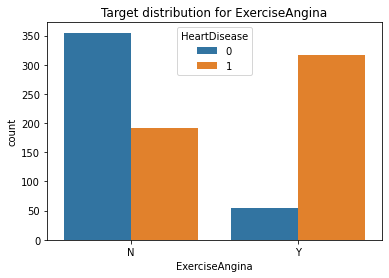

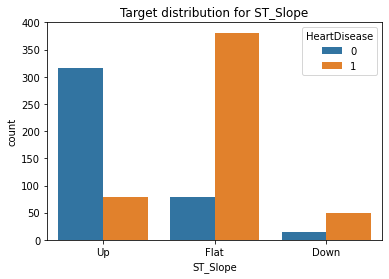

In [ ]:
for column in df.columns:
    if df[column].dtype==('O'):
        sns.countplot(data=df, x=column, hue='HeartDisease')
        plt.title(f'Target distribution for {column}')
        plt.show()

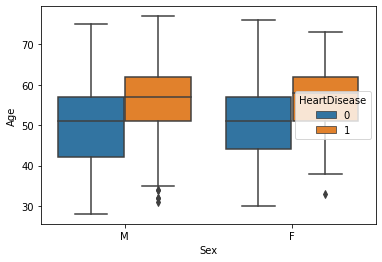

In [ ]:
sns.boxplot(data=df, y="Age", x="Sex", hue='HeartDisease')

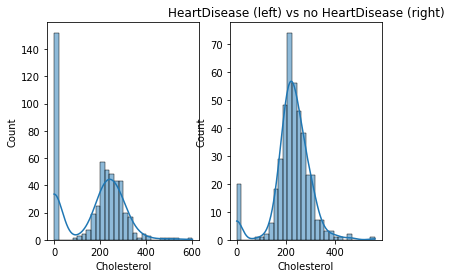

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2)
plt.title('HeartDisease (left) vs no HeartDisease (right)')
sns.histplot(data = df[df.HeartDisease==1], x = 'Cholesterol', bins = 30, kde = True, ax=ax1)
sns.histplot(data = df[df.HeartDisease==0], x = 'Cholesterol', bins = 30, kde = True, ax=ax2)

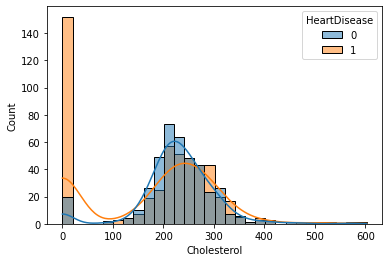

In [ ]:
sns.histplot(data = df, x = 'Cholesterol', bins = 30, kde = True, hue='HeartDisease')

In [ ]:
df.Cholesterol.value_counts()

0      172
254     11
223     10
220     10
230      9
      ... 
392      1
316      1
153      1
466      1
131      1
Name: Cholesterol, Length: 222, dtype: int64

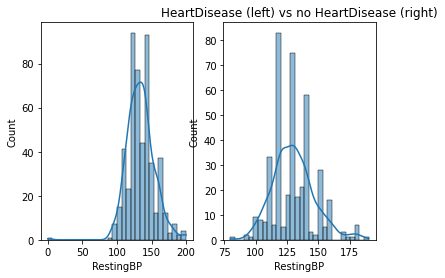

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2)
plt.title('HeartDisease (left) vs no HeartDisease (right)')
sns.histplot(data = df[df.HeartDisease==1], x = 'RestingBP', bins = 30, kde = True, ax=ax1)
sns.histplot(data = df[df.HeartDisease==0], x = 'RestingBP', bins = 30, kde = True, ax=ax2)

In [ ]:
df.sort_values(by='RestingBP', ascending=True).head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
449,55,M,NAP,0,0,0,Normal,155,N,1.5,Flat,1
314,53,M,ASY,80,0,0,Normal,141,Y,2.0,Down,0
227,38,M,ASY,92,117,0,Normal,134,Y,2.5,Flat,1
692,39,F,NAP,94,199,0,Normal,179,N,0.0,Up,0
832,51,M,NAP,94,227,0,Normal,154,Y,0.0,Up,0


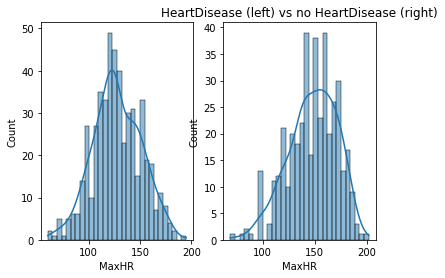

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2)
plt.title('HeartDisease (left) vs no HeartDisease (right)')
sns.histplot(data = df[df.HeartDisease==1], x = 'MaxHR', bins = 30, kde = True, ax=ax1)
sns.histplot(data = df[df.HeartDisease==0], x = 'MaxHR', bins = 30, kde = True, ax=ax2)

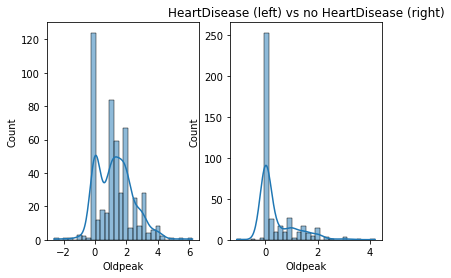

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2)
plt.title('HeartDisease (left) vs no HeartDisease (right)')
sns.histplot(data = df[df.HeartDisease==1], x = 'Oldpeak', bins = 30, kde = True, ax=ax1)
sns.histplot(data = df[df.HeartDisease==0], x = 'Oldpeak', bins = 30, kde = True, ax=ax2)

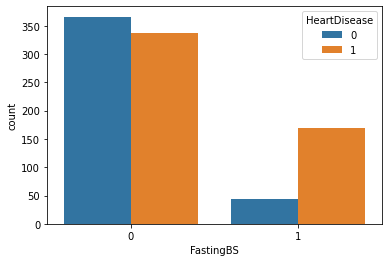

In [ ]:
sns.countplot(data = df, x = 'FastingBS', hue='HeartDisease')

In [ ]:
df.columns
"""
Age -> higher age, greater probability of having Heart Disease 

Sex -> Men are more likely to have HD

ChestPainType -> ATA, NAP, TA - healthy, ASY - very likely to have HD

RestingBP -> Out of all of the numeric features, RestingBP correlation with target variable is the closest to 0. The average RestingBP value for
people with HD is quite higher.
Data requires cleaning.

Cholesterol -> 172 samples have cholesterol value equal to 0 - data requires cleaning

MaxHR -> healthy people have higher mean

ExerciseAngina -> very likely to have HD if yes

Oldpeak ->

ST_Slope -> if not 'Up' - unhealthy
"""

"\nAge -> higher age, greater probability of having Heart Disease \n\nSex -> Men are more likely to have HD\n\nChestPainType -> ATA, NAP, TA - healthy, ASY - very likely to have HD\n\nRestingBP -> Out of all of the numeric features, RestingBP correlation with target variable is the closest to 0. The average RestingBP value for\npeople with HD is quite higher.\nData requires cleaning.\n\nCholesterol -> 172 samples have cholesterol value equal to 0 - data requires cleaning\n\nMaxHR -> healthy people have higher mean\n\nExerciseAngina -> very likely to have HD if yes\n\nOldpeak ->\n\nST_Slope -> if not 'Up' - unhealthy\n"

## 1ST MODEL (DROPPING ROWS WITH CHOLESTEROL = 0)

In [ ]:
df=pd.read_csv('/content/heart.csv')
df1=df[df.Cholesterol!=0]
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 746 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             746 non-null    int64  
 1   Sex             746 non-null    object 
 2   ChestPainType   746 non-null    object 
 3   RestingBP       746 non-null    int64  
 4   Cholesterol     746 non-null    int64  
 5   FastingBS       746 non-null    int64  
 6   RestingECG      746 non-null    object 
 7   MaxHR           746 non-null    int64  
 8   ExerciseAngina  746 non-null    object 
 9   Oldpeak         746 non-null    float64
 10  ST_Slope        746 non-null    object 
 11  HeartDisease    746 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 75.8+ KB


In [ ]:
df[df.RestingBP==0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
449,55,M,NAP,0,0,0,Normal,155,N,1.5,Flat,1


In [ ]:
df[df.HeartDisease==1]['RestingBP'].mean()

134.18503937007873

In [ ]:
df1[df1.RestingBP==0]['RestingBP'].replace(to_replace=0, value = df[df.HeartDisease==1]['RestingBP'].mean(), inplace=True)

In [ ]:
df1.HeartDisease.value_counts() #balanced

0    390
1    356
Name: HeartDisease, dtype: int64

In [ ]:
df1.replace({'ExerciseAngina' : { 'N' : 0, 'Y' : 1}},inplace=True)
df1.replace({'Sex' : { 'F' : 0, 'M' : 1}},inplace=True)
df1.head()

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,ATA,140,289,0,Normal,172,0,0.0,Up,0
1,49,0,NAP,160,180,0,Normal,156,0,1.0,Flat,1
2,37,1,ATA,130,283,0,ST,98,0,0.0,Up,0
3,48,0,ASY,138,214,0,Normal,108,1,1.5,Flat,1
4,54,1,NAP,150,195,0,Normal,122,0,0.0,Up,0


In [ ]:
df1=pd.get_dummies(df1, columns=['ChestPainType','RestingECG','ST_Slope'], drop_first=True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 746 entries, 0 to 917
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                746 non-null    int64  
 1   Sex                746 non-null    int64  
 2   RestingBP          746 non-null    int64  
 3   Cholesterol        746 non-null    int64  
 4   FastingBS          746 non-null    int64  
 5   MaxHR              746 non-null    int64  
 6   ExerciseAngina     746 non-null    int64  
 7   Oldpeak            746 non-null    float64
 8   HeartDisease       746 non-null    int64  
 9   ChestPainType_ATA  746 non-null    uint8  
 10  ChestPainType_NAP  746 non-null    uint8  
 11  ChestPainType_TA   746 non-null    uint8  
 12  RestingECG_Normal  746 non-null    uint8  
 13  RestingECG_ST      746 non-null    uint8  
 14  ST_Slope_Flat      746 non-null    uint8  
 15  ST_Slope_Up        746 non-null    uint8  
dtypes: float64(1), int64(8), u

In [ ]:
X1=df1.drop(columns='HeartDisease',axis=1)
y1=df1.HeartDisease

In [ ]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.33, random_state=42)

In [ ]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train1, y_train1, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.843633 (0.047359)
LDA: 0.847673 (0.048396)
KNN: 0.687347 (0.058909)
CART: 0.749592 (0.052732)
NB: 0.833673 (0.049000)
SVM: 0.567061 (0.030927)


In [ ]:
xg_cl = xgb.XGBClassifier(objective='binary:logistic', n_estimators=10, seed=42)
xg_cl.fit(X_train1, y_train1)
preds = xg_cl.predict(X_test1)
accuracy = float(np.sum(preds==y_test1))/y_test1.shape[0]
print("accuracy: %f" % (accuracy))

accuracy: 0.878543


In [ ]:
xgb_clf = XGBClassifier(objective='binary:logistic')
# Create parameter grid
param_grid = {
 'max_depth': [1,2,3],
 'learning_rate': [0.2, 0.25, 0.3],
 'n_estimators': [45, 50, 55]
}
# Create the GridSearchCV object
grid_search = GridSearchCV(xgb_clf, param_grid, cv=5, n_jobs=-1, verbose=2)
# Fit the grid search object to the data
grid_search.fit(X_train1, y_train1)
# Print the best parameters and score
print("Best Parameters: {}".format(grid_search.best_params_))
print("Best Score: {}".format(grid_search.best_score_))

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters: {'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 55}
Best Score: 0.8616767676767678


In [ ]:
xgb_clf = XGBClassifier(objective='binary:logistic',learning_rate= 0.25, max_depth= 2, n_estimators= 50)
kf = KFold(n_splits=6, shuffle=True, random_state=5)
cv_scores = cross_val_score(xgb_clf, X_train1, y_train1, cv=kf, scoring='roc_auc')
print(cv_scores.mean())
scores1=cv_scores.mean()
xgb_clf.fit(X_train1,y_train1)
predictions1=xgb_clf.predict(X_test1)
print(accuracy_score(y_test1, predictions1))
print(confusion_matrix(y_test1, predictions1))
print(classification_report(y_test1, predictions1))

0.9091713006842642
0.8866396761133604
[[109  12]
 [ 16 110]]
              precision    recall  f1-score   support

           0       0.87      0.90      0.89       121
           1       0.90      0.87      0.89       126

    accuracy                           0.89       247
   macro avg       0.89      0.89      0.89       247
weighted avg       0.89      0.89      0.89       247



In [ ]:
scaler = StandardScaler()
X_scaled1 = scaler.fit_transform(X1)

In [ ]:
X_train1,X_test1,y_train1,y_test1=train_test_split(X_scaled1,y1, test_size=0.33,random_state=42)

In [ ]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train1, y_train1, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.845592 (0.046077)
LDA: 0.847673 (0.048396)
KNN: 0.855714 (0.047143)
CART: 0.739469 (0.045635)
NB: 0.833673 (0.049000)
SVM: 0.845714 (0.054376)


## 2ND MODEL (REPLACING ROWS WITH CHOLESTEROL = 0 WITH MEAN CHOLESTEROL VALUE FOR A GIVEN TARGET CLASS)

In [ ]:
df=pd.read_csv('/content/heart.csv')
df2=df
meanChol0=df[(df.HeartDisease==0) & (df.Cholesterol!=0)]['Cholesterol'].mean()
meanChol1=df[(df.HeartDisease==1) & (df.Cholesterol!=0)]['Cholesterol'].mean()

In [ ]:
df2['Cholesterol'] = np.where((df2['Cholesterol'] == 0) & (df2['HeartDisease'] == 0), meanChol0, df2['Cholesterol'])
df2['Cholesterol'] = np.where((df2['Cholesterol'] == 0) & (df2['HeartDisease'] == 1), meanChol1, df2['Cholesterol'])

In [ ]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.0,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.0,130.0,140.0,200.0
Cholesterol,918.0,245.571653,53.380997,85.0,214.0,250.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.0,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.0,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.0,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.0,1.0,1.0,1.0


In [ ]:
df2[df2.RestingBP==0]['RestingBP'].replace(to_replace=0, value = df[df.HeartDisease==1]['RestingBP'].mean(), inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [ ]:
df2.replace({'ExerciseAngina' : { 'N' : 0, 'Y' : 1}},inplace=True)
df2.replace({'Sex' : { 'F' : 0, 'M' : 1}},inplace=True)
df2.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,ATA,140,289.0,0,Normal,172,0,0.0,Up,0
1,49,0,NAP,160,180.0,0,Normal,156,0,1.0,Flat,1
2,37,1,ATA,130,283.0,0,ST,98,0,0.0,Up,0
3,48,0,ASY,138,214.0,0,Normal,108,1,1.5,Flat,1
4,54,1,NAP,150,195.0,0,Normal,122,0,0.0,Up,0


In [ ]:
df2=pd.get_dummies(df2, columns=['ChestPainType','RestingECG','ST_Slope'], drop_first=True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                918 non-null    int64  
 1   Sex                918 non-null    int64  
 2   RestingBP          918 non-null    int64  
 3   Cholesterol        918 non-null    float64
 4   FastingBS          918 non-null    int64  
 5   MaxHR              918 non-null    int64  
 6   ExerciseAngina     918 non-null    int64  
 7   Oldpeak            918 non-null    float64
 8   HeartDisease       918 non-null    int64  
 9   ChestPainType_ATA  918 non-null    uint8  
 10  ChestPainType_NAP  918 non-null    uint8  
 11  ChestPainType_TA   918 non-null    uint8  
 12  RestingECG_Normal  918 non-null    uint8  
 13  RestingECG_ST      918 non-null    uint8  
 14  ST_Slope_Flat      918 non-null    uint8  
 15  ST_Slope_Up        918 non-null    uint8  
dtypes: float64(2), int64(7), u

In [ ]:
X2=df2.drop(columns='HeartDisease',axis=1)
y2=df2.HeartDisease

In [ ]:
X_train2,X_test2,y_train2,y_test2=train_test_split(X2,y2, test_size=0.3,random_state=42)

In [ ]:
xgb_clf = XGBClassifier()
# Create parameter grid
param_grid = {
 'max_depth': [1,2,3],
 'learning_rate': [0.1, 0.2, 0.3],
 'n_estimators': [50, 55, 60]
}
# Create the GridSearchCV object
grid_search = GridSearchCV(xgb_clf, param_grid, cv=5, n_jobs=-1, verbose=2)
# Fit the grid search object to the data
grid_search.fit(X2, y2)
# Print the best parameters and score
print("Best Parameters: {}".format(grid_search.best_params_))
print("Best Score: {}".format(grid_search.best_score_))

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters: {'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 55}
Best Score: 0.8604122119268235


In [ ]:
xgb_clf = XGBClassifier(learning_rate= 0.25, max_depth= 2, n_estimators= 55)
kf = KFold(n_splits=6, shuffle=True, random_state=5)
cv_scores = cross_val_score(xgb_clf, X_train2, y_train2, cv=kf, scoring='roc_auc')
print(cv_scores.mean())
scores2=cv_scores.mean()

0.9314878297059311


In [ ]:
xgb_clf.fit(X_train2,y_train2)
predictions2=xgb_clf.predict(X_test2)
print(accuracy_score(y_test2, predictions2))
print(confusion_matrix(y_test2, predictions2))
print(classification_report(y_test2, predictions2))

0.894927536231884
[[100  12]
 [ 17 147]]
              precision    recall  f1-score   support

           0       0.85      0.89      0.87       112
           1       0.92      0.90      0.91       164

    accuracy                           0.89       276
   macro avg       0.89      0.89      0.89       276
weighted avg       0.90      0.89      0.90       276



In [ ]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train2, y_train2, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.851899 (0.041737)
LDA: 0.853462 (0.043416)
KNN: 0.677861 (0.059672)
CART: 0.752404 (0.056534)
NB: 0.839447 (0.039840)
SVM: 0.563918 (0.025897)


## 3RD MODEL (NO DATA CLEANING)

In [ ]:
df=pd.read_csv('/content/heart.csv')
df3=df
df3.replace({'ExerciseAngina' : { 'N' : 0, 'Y' : 1}},inplace=True)
df3.replace({'Sex' : { 'F' : 0, 'M' : 1}},inplace=True)

In [ ]:
df3=pd.get_dummies(df3, columns=['ChestPainType','RestingECG','ST_Slope'], drop_first=True)
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                918 non-null    int64  
 1   Sex                918 non-null    int64  
 2   RestingBP          918 non-null    int64  
 3   Cholesterol        918 non-null    int64  
 4   FastingBS          918 non-null    int64  
 5   MaxHR              918 non-null    int64  
 6   ExerciseAngina     918 non-null    int64  
 7   Oldpeak            918 non-null    float64
 8   HeartDisease       918 non-null    int64  
 9   ChestPainType_ATA  918 non-null    uint8  
 10  ChestPainType_NAP  918 non-null    uint8  
 11  ChestPainType_TA   918 non-null    uint8  
 12  RestingECG_Normal  918 non-null    uint8  
 13  RestingECG_ST      918 non-null    uint8  
 14  ST_Slope_Flat      918 non-null    uint8  
 15  ST_Slope_Up        918 non-null    uint8  
dtypes: float64(1), int64(8), u

In [ ]:
X3=df3.drop(columns='HeartDisease',axis=1)
y3=df3.HeartDisease

In [ ]:
X_train3,X_test3,y_train3,y_test3=train_test_split(X3,y3, test_size=0.3,random_state=42)

In [ ]:
xgb_clf = XGBClassifier()
# Create parameter grid
param_grid = {
 'max_depth': [1,2,3],
 'learning_rate': [0.2, 0.25, 0.3],
 'n_estimators': [45, 50, 55]
}
# Create the GridSearchCV object
grid_search = GridSearchCV(xgb_clf, param_grid, cv=5, n_jobs=-1, verbose=2)
# Fit the grid search object to the data
grid_search.fit(X_train3, y_train3)
# Print the best parameters and score
print("Best Parameters: {}".format(grid_search.best_params_))
print("Best Score: {}".format(grid_search.best_score_))

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters: {'learning_rate': 0.25, 'max_depth': 3, 'n_estimators': 50}
Best Score: 0.8644500968992247


In [ ]:
xgb_clf = XGBClassifier(learning_rate= 0.25, max_depth= 3, n_estimators= 50)
kf = KFold(n_splits=6, shuffle=True, random_state=5)
cv_scores = cross_val_score(xgb_clf, X_train3, y_train3, cv=kf, scoring='roc_auc')
print(cv_scores.mean())
scores3=cv_scores.mean()

0.9125553150528769


In [ ]:
xgb_clf.fit(X_train3,y_train3)
predictions3=xgb_clf.predict(X_test3)
print(accuracy_score(y_test3, predictions3))
print(confusion_matrix(y_test3, predictions3))
print(classification_report(y_test3, predictions3))

0.8840579710144928
[[100  12]
 [ 20 144]]
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       112
           1       0.92      0.88      0.90       164

    accuracy                           0.88       276
   macro avg       0.88      0.89      0.88       276
weighted avg       0.89      0.88      0.88       276



In [ ]:
print("Cross Validation Score : ",'{0:.2%}'.format(cross_val_score(xgb_clf,X2,y2,cv = kf,scoring = 'roc_auc').mean()))

Cross Validation Score :  94.18%


In [ ]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train3, y_train3, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.848750 (0.048225)
LDA: 0.851875 (0.049799)
KNN: 0.696370 (0.044535)
CART: 0.764736 (0.062186)
NB: 0.853510 (0.048677)
SVM: 0.554543 (0.027492)


In [ ]:
scaler = StandardScaler()
X_scaled3 = scaler.fit_transform(X3)

In [ ]:
X_train3,X_test3,y_train3,y_test3=train_test_split(X_scaled3,y3, test_size=0.3,random_state=42)

In [ ]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train3, y_train3, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.848750 (0.049227)
LDA: 0.851875 (0.049799)
KNN: 0.850361 (0.045557)
CART: 0.761659 (0.044803)
NB: 0.853510 (0.048677)
SVM: 0.867500 (0.052972)


## FOURTH MODEL (AVOIDING CHOLESTEROL)

In [ ]:
df=pd.read_csv('/content/heart.csv')
df4=df

In [ ]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
df4.replace({'ExerciseAngina' : { 'N' : 0, 'Y' : 1}},inplace=True)
df4.replace({'Sex' : { 'F' : 0, 'M' : 1}},inplace=True)
df4=pd.get_dummies(df, columns=['ChestPainType','ST_Slope'], drop_first=True)
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                918 non-null    int64  
 1   Sex                918 non-null    int64  
 2   RestingBP          918 non-null    int64  
 3   Cholesterol        918 non-null    int64  
 4   FastingBS          918 non-null    int64  
 5   RestingECG         918 non-null    object 
 6   MaxHR              918 non-null    int64  
 7   ExerciseAngina     918 non-null    int64  
 8   Oldpeak            918 non-null    float64
 9   HeartDisease       918 non-null    int64  
 10  ChestPainType_ATA  918 non-null    uint8  
 11  ChestPainType_NAP  918 non-null    uint8  
 12  ChestPainType_TA   918 non-null    uint8  
 13  ST_Slope_Flat      918 non-null    uint8  
 14  ST_Slope_Up        918 non-null    uint8  
dtypes: float64(1), int64(8), object(1), uint8(5)
memory usage: 76.3+ KB


In [ ]:
X4=df4.drop(columns=['HeartDisease', 'RestingBP', 'RestingECG'],axis=1)
y4=df4.HeartDisease

In [ ]:
X_train4,X_test4,y_train4,y_test4=train_test_split(X4,y4, test_size=0.3,random_state=42)

In [ ]:
xgb_clf = XGBClassifier()
# Create parameter grid
param_grid = {
 'max_depth': [1,2,3],
 'learning_rate': [0.2, 0.25, 0.3],
 'n_estimators': [45, 50, 55]
}
# Create the GridSearchCV object
grid_search = GridSearchCV(xgb_clf, param_grid, cv=5, n_jobs=-1, verbose=2)
# Fit the grid search object to the data
grid_search.fit(X_train4, y_train4)
# Print the best parameters and score
print("Best Parameters: {}".format(grid_search.best_params_))
print("Best Score: {}".format(grid_search.best_score_))

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters: {'learning_rate': 0.3, 'max_depth': 3, 'n_estimators': 45}
Best Score: 0.862875484496124


In [ ]:
xgb_clf = XGBClassifier(learning_rate= 0.3, max_depth= 3, n_estimators= 45)
kf = KFold(n_splits=6, shuffle=True, random_state=5)
cv_scores = cross_val_score(xgb_clf, X_train4, y_train4, cv=kf, scoring='roc_auc')
print(cv_scores.mean())
scores4=cv_scores.mean()

0.9108411376324063


In [ ]:
xgb_clf.fit(X_train4,y_train4)
predictions4=xgb_clf.predict(X_test4)
print(accuracy_score(y_test4, predictions4))
print(confusion_matrix(y_test4, predictions4))
print(classification_report(y_test4, predictions4))

0.8768115942028986
[[ 99  13]
 [ 21 143]]
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       112
           1       0.92      0.87      0.89       164

    accuracy                           0.88       276
   macro avg       0.87      0.88      0.87       276
weighted avg       0.88      0.88      0.88       276



## COMPARISION

In [ ]:
print('RandomForestClassifier:')

kf = KFold(n_splits=6, shuffle=True, random_state=5)
cv_scores = cross_val_score(RandomForestClassifier(n_estimators=200), X_train1, y_train1, cv=kf, scoring='roc_auc')
print(f"First model cross-validation score (scoring='roc_auc'): {cv_scores.mean()}")

cv_scores = cross_val_score(RandomForestClassifier(n_estimators=200), X_train2, y_train2, cv=kf, scoring='roc_auc')
print(f"Second model cross-validation score (scoring='roc_auc'): {cv_scores.mean()}")

cv_scores = cross_val_score(RandomForestClassifier(n_estimators=200), X_train3, y_train3, cv=kf, scoring='roc_auc')
print(f"Third model cross-validation score (scoring='roc_auc'): {cv_scores.mean()}")

cv_scores = cross_val_score(RandomForestClassifier(n_estimators=200), X_train4, y_train4, cv=kf, scoring='roc_auc')
print(f"Fourth model cross-validation score (scoring='roc_auc'): {cv_scores.mean()}")

RandomForestClassifier:
First model cross-validation score (scoring='roc_auc'): 0.9174116013393077
Second model cross-validation score (scoring='roc_auc'): 0.921683039916496
Third model cross-validation score (scoring='roc_auc'): 0.9140209807892402
Fourth model cross-validation score (scoring='roc_auc'): 0.9118125427575013


In [ ]:
print("xgboost classifier:")

print(f"First model cross-validation score (scoring='roc_auc'): {scores1}")

print(f"Second model cross-validation score (scoring='roc_auc'): {scores2}")

print(f"Third model cross-validation score (scoring='roc_auc'): {scores3}")

print(f"Fourth model cross-validation score (scoring='roc_auc'): {scores4}")

xgboost classifier:
First model cross-validation score (scoring='roc_auc'): 0.9091713006842642
Second model cross-validation score (scoring='roc_auc'): 0.9314878297059311
Third model cross-validation score (scoring='roc_auc'): 0.9125553150528769
Fourth model cross-validation score (scoring='roc_auc'): 0.9108411376324063


# SECOND DATASET

Heart Disease Dataset (https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset)

In [ ]:
dfB=pd.read_csv("/content/heart (2).csv")
dfB.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


## EXPLORATORY DATA ANALYSIS

In [ ]:
dfB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
print(dfB[dfB.target==0].describe().T)
print(dfB[dfB.target==1].describe().T)

          count        mean        std    min    25%    50%    75%    max
age       499.0   56.569138   7.908153   35.0   52.0   58.0   62.0   77.0
sex       499.0    0.827655   0.378059    0.0    1.0    1.0    1.0    1.0
cp        499.0    0.482966   0.908024    0.0    0.0    0.0    0.0    3.0
trestbps  499.0  134.106212  18.576736  100.0  120.0  130.0  144.0  200.0
chol      499.0  251.292585  49.558924  131.0  217.0  249.0  284.0  409.0
fbs       499.0    0.164329   0.370945    0.0    0.0    0.0    0.0    1.0
restecg   499.0    0.456914   0.544825    0.0    0.0    0.0    1.0    2.0
thalach   499.0  139.130261  22.565235   71.0  125.0  142.0  156.0  195.0
exang     499.0    0.549098   0.498083    0.0    0.0    1.0    1.0    1.0
oldpeak   499.0    1.600200   1.290956    0.0    0.6    1.4    2.5    6.2
slope     499.0    1.166333   0.568932    0.0    1.0    1.0    2.0    2.0
ca        499.0    1.158317   1.032108    0.0    0.0    1.0    2.0    4.0
thal      499.0    2.539078   0.685460

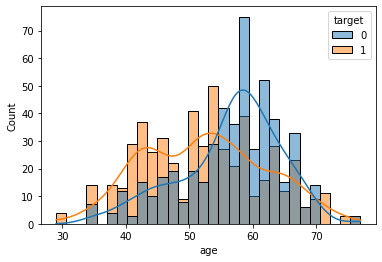

In [ ]:
sns.histplot(data=dfB, x='age',hue='target',bins = 30, kde = True)

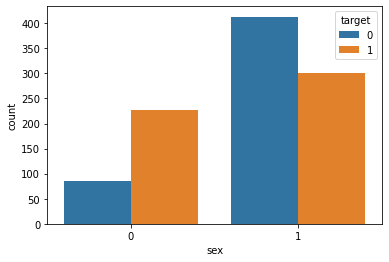

In [ ]:
sns.countplot(data=dfB, x='sex',hue='target')

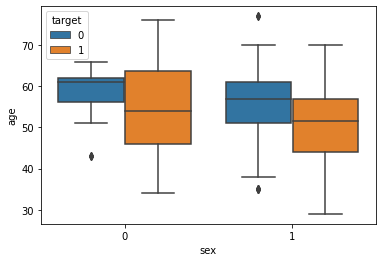

In [ ]:
sns.boxplot(data=dfB, y="age", x="sex", hue='target')

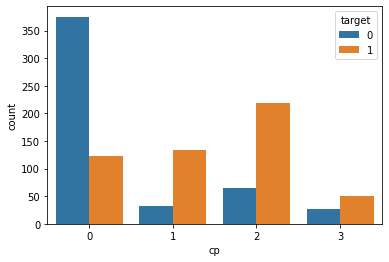

In [ ]:
sns.countplot(data=dfB, x='cp',hue='target')

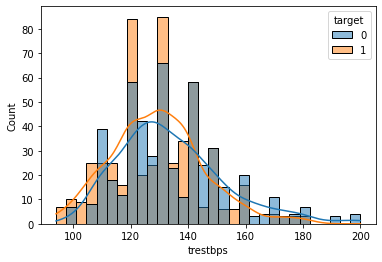

In [ ]:
sns.histplot(data=dfB, x='trestbps',hue='target',bins = 30, kde = True)

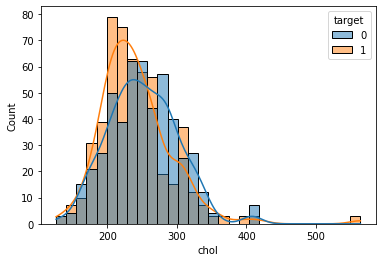

In [ ]:
sns.histplot(data=dfB, x='chol',hue='target',bins = 30, kde = True)

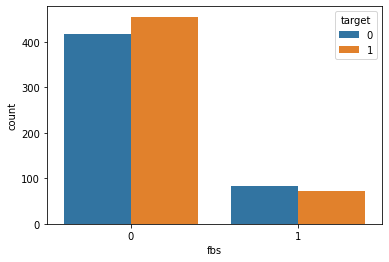

In [ ]:
sns.countplot(data=dfB, x='fbs',hue='target')

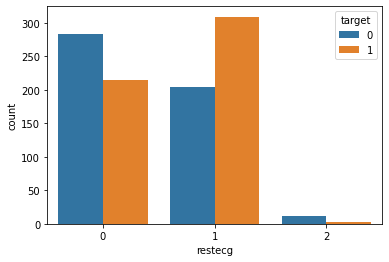

In [ ]:
sns.countplot(data=dfB, x='restecg',hue='target')

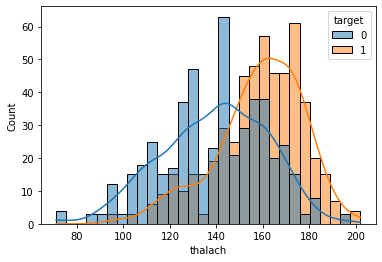

In [ ]:
sns.histplot(data=dfB, x='thalach',hue='target',bins = 30, kde = True)

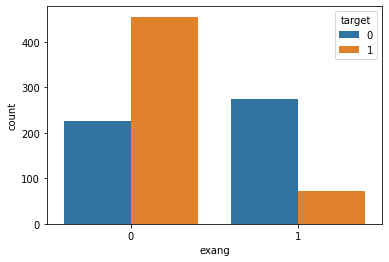

In [ ]:
sns.countplot(data=dfB, x='exang',hue='target')

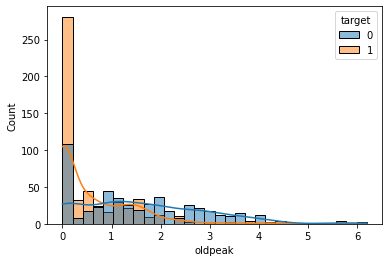

In [ ]:
sns.histplot(data=dfB, x='oldpeak',hue='target',bins = 30, kde = True)

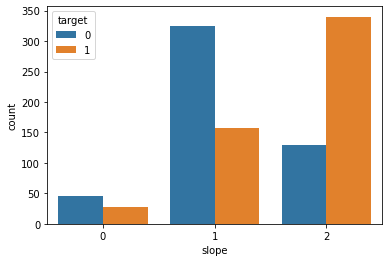

In [ ]:
sns.countplot(data=dfB, x='slope',hue='target')

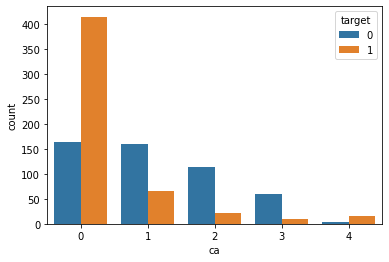

In [ ]:
sns.countplot(data=dfB, x='ca',hue='target')

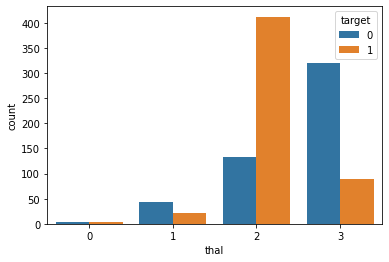

In [ ]:
sns.countplot(data=dfB, x='thal',hue='target')

In [ ]:
dfB.corrwith(dfB["target"]).sort_values(ascending=False)

target      1.000000
cp          0.434854
thalach     0.422895
slope       0.345512
restecg     0.134468
fbs        -0.041164
chol       -0.099966
trestbps   -0.138772
age        -0.229324
sex        -0.279501
thal       -0.337838
ca         -0.382085
exang      -0.438029
oldpeak    -0.438441
dtype: float64

## Modelling

In [ ]:
X=dfB.drop('target',axis=1)
y=dfB.target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
clf=RandomForestClassifier(n_estimators=150)
clf.fit(X_train, y_train)
predictions=clf.predict(X_test)

In [ ]:
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

0.9805194805194806
[[159   0]
 [  6 143]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       159
           1       1.00      0.96      0.98       149

    accuracy                           0.98       308
   macro avg       0.98      0.98      0.98       308
weighted avg       0.98      0.98      0.98       308



In [ ]:
kf = KFold(n_splits=6, shuffle=True, random_state=5)
cv_scores = cross_val_score(RandomForestClassifier(n_estimators=150), X_train, y_train, cv=kf,scoring='accuracy')
print(cv_scores.mean())

0.9791083099906629
